# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Introduction**
Analyze Fitly's data using [da_fitly_account_info.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_account_info.csv?),[da_fitly_customer_support.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_customer_support.csv?), and [da_fitly_user_activity.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_user_activity.csv?) datasets.

### **Consolidated Scope:**
*   **Primary Goal:** Reduce customer churn at Fitly Tech.
*   **Data Sources:** [da_fitly_account_info.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_account_info.csv?)', '[da_fitly_customer_support.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_customer_support.csv?)', and '[da_fitly_user_activity.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_user_activity.csv?)' datasets
  
*   **Key Analytical Areas:**
    *   Identify churn drivers.
    *   Analyse subscription plan effectiveness and free trial conversion.
    *   Assess the impact of customer support interactions on churn.
    *   Understand user engagement and activity patterns related to churn.
*   **Anticipated Challenges:** Data quality issues due to lack of standardisation across datasets.
*   **Expected Outcome:** Actionable insights, data visualisations, and recommendations for leadership to decrease churn and improve customer retention.

## **Library import**

In [31]:
# Imports necssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

Load the '[da_fitly_account_info.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_account_info.csv?)', '[da_fitly_customer_support.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_customer_support.csv?)', and '[da_fitly_user_activity.csv](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_user_activity.csv?)' datasets into pandas DataFrames to begin data processing.  After loading, I will display the first few rows and column names of each DataFrame to confirm the data has been loaded correctly.

In [32]:
# Load the datasets
account_info = pd.read_csv("E:\Arewa-Data-Science\Datacamp\PDA\subscriber-churn-analysis\Dataset\da_fitly_account_info.csv")
customer_support = pd.read_csv("E:\Arewa-Data-Science\Datacamp\PDA\subscriber-churn-analysis\Dataset\da_fitly_customer_support.csv")
user_activity = pd.read_csv("E:\Arewa-Data-Science\Datacamp\PDA\subscriber-churn-analysis\Dataset\da_fitly_user_activity.csv")

print("--- account_info ---")
print(account_info.head())
print("Columns:", account_info.columns.tolist())

print("\n--- customer_support ---")
print(customer_support.head())
print("Columns:", customer_support.columns.tolist())

print("\n--- user_activity ---")
print(user_activity.head())
print("Columns:", user_activity.columns.tolist())

--- account_info ---
  customer_id                  email       state        plan  plan_list_price  \
0      C10000  user10000@example.com  New Jersey  Enterprise              105   
1      C10001  user10001@example.net   Louisiana       Basic               22   
2      C10002  user10002@example.net    Oklahoma       Basic               24   
3      C10003  user10003@example.com    Michigan        Free                0   
4      C10004  user10004@example.com       Texas  Enterprise              119   

  churn_status  
0            Y  
1            Y  
2          NaN  
3          NaN  
4          NaN  
Columns: ['customer_id', 'email', 'state', 'plan', 'plan_list_price', 'churn_status']

--- customer_support ---
                  ticket_time  user_id channel      topic  \
0  2025-06-13 05:55:17.154573    10125    chat  technical   
1  2025-08-06 13:21:54.539551    10109    chat    account   
2  2025-08-22 12:39:35.718663    10149    chat  technical   
3  2025-06-07 02:49:46.986055    1

## **Dataset and detail summary of each column**

**Account Information** (_[da_fitly_account_info](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_account_info.csv?)_.csv)

- `customer_id`: A unique alphanumeric identifier for each customer (e.g., C10000).

- `email`: The contact email address associated with the user's account.

- `state`: The US state where the user is located, derived from their billing information.

- `plan`: The subscription tier the user is currently on (Free, Basic, Pro, or Enterprise).

- `plan_list_price`: The actual numeric price paid by the user for their specific plan.

- `churn_status`: Indicates if a user has cancelled their subscription ('Y' for churned; null/missing values represent active customers).

**Customer Support** (_[da_fitly_customer_support](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_customer_support.csv?)_.csv)

- `ticket_time`: The timestamp when the support request was received, recorded in Pacific Time (PT).

- `user_id`: The numeric portion of the customer ID used to link support tickets to account data.

- `channel`: The method used to contact support (chat, phone, email, or '-' for unknown).

- `topic`: The category of the issue (technical, account, billing, or other).

- `resolution_time_hours`: The calculated duration (in hours) from the time a ticket was opened until it was closed.

- `state`: The current status of the ticket (1 for closed, 0 for open).

- `comments`: Optional text fields containing specific user requests (e.g., GDPR data deletion requests).

**User Activity** (_[da_fitly_user_activity](https://s3.us-east-1.amazonaws.com/talent-assets.datacamp.com/da_fitly_user_activity.csv?)_.csv)

- `event_time`: The exact timestamp when a user performed an action within the app.

- `user_id`: The numeric ID identifying which customer performed the activity.

- `event_type`: The specific action taken by the user (watch_video, track_workout, read_article, or share_workout).

## **Initial Data Exploration and Cleaning**
This includes checking for missing values, data types, and basic descriptive statistics. Address any immediate data cleaning needs, such as converting data types or handling missing values, based on the findings and the project instructions.

Let first examine the `account_info` DataFrame and check the distribution of key categorical columns like 'plan' and 'state'.

In [33]:
print("\n--- account_info: Info ---")
account_info.info()

print("\n--- account_info: Descriptive Statistics ---")
print(account_info.describe())

print("\n--- account_info: Missing Values ---")
print(account_info.isnull().sum())

print("\n--- account_info: Unique values for 'plan' ---")
print(account_info['plan'].value_counts())

print("\n--- account_info: Unique values for 'state' ---")
print(account_info['state'].value_counts())


--- account_info: Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      400 non-null    object
 1   email            400 non-null    object
 2   state            400 non-null    object
 3   plan             400 non-null    object
 4   plan_list_price  400 non-null    int64 
 5   churn_status     114 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.9+ KB

--- account_info: Descriptive Statistics ---
       plan_list_price
count       400.000000
mean         43.965000
std          45.263348
min           0.000000
25%           0.000000
50%          26.000000
75%          77.250000
max         148.000000

--- account_info: Missing Values ---
customer_id          0
email                0
state                0
plan                 0
plan_list_price      0
churn_status       286
dtype: int64

--- account_in

Now let examine the `customer_support` DataFrame and check the distribution of key categorical columns like 'channel' and 'topic'

In [34]:
print("\n--- customer_support: Info ---")
customer_support.info()

print("\n--- customer_support: Descriptive Statistics ---")
print(customer_support.describe())

print("\n--- customer_support: Missing Values ---")
print(customer_support.isnull().sum())

print("\n--- customer_support: Unique values for 'channel' ---")
print(customer_support['channel'].value_counts())

print("\n--- customer_support: Unique values for 'topic' ---")
print(customer_support['topic'].value_counts())


--- customer_support: Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ticket_time            918 non-null    object 
 1   user_id                918 non-null    int64  
 2   channel                918 non-null    object 
 3   topic                  918 non-null    object 
 4   resolution_time_hours  918 non-null    float64
 5   state                  918 non-null    int64  
 6   comments               46 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.3+ KB

--- customer_support: Descriptive Statistics ---
            user_id  resolution_time_hours       state
count    918.000000             918.000000  918.000000
mean   10201.985839              10.391362    0.549020
std      116.048475               7.079888    0.497863
min    10000.000000               0.520000    0.000000
25%    1

Now examine the `user_activity` DataFrame and check the unique value of `even_type`

In [35]:
print("\n--- user_activity: Info ---")
user_activity.info()

print("\n--- user_activity: Descriptive Statistics ---")
print(user_activity.describe())

print("\n--- user_activity: Missing Values ---")
print(user_activity.isnull().sum())

print("\n--- user_activity: Unique values for 'event_type' ---")
print(user_activity['event_type'].value_counts())


--- user_activity: Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  445 non-null    object
 1   user_id     445 non-null    int64 
 2   event_type  445 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.6+ KB

--- user_activity: Descriptive Statistics ---
            user_id
count    445.000000
mean   10198.930337
std      113.583807
min    10000.000000
25%    10110.000000
50%    10197.000000
75%    10294.000000
max    10396.000000

--- user_activity: Missing Values ---
event_time    0
user_id       0
event_type    0
dtype: int64

--- user_activity: Unique values for 'event_type' ---
event_type
read_article     125
watch_video      120
track_workout    108
share_workout     92
Name: count, dtype: int64


## **Data Cleaning and Validation**

For time base analysis, there is a need to convert the 'ticket_time' column in `customer_support` and 'event_time' column in `user_activity` to datetime objects.

In [36]:
customer_support['ticket_time'] = pd.to_datetime(customer_support['ticket_time'])
user_activity['event_time'] = pd.to_datetime(user_activity['event_time'])

print("Converted 'ticket_time' in customer_support and 'event_time' in user_activity to datetime objects.")
print("customer_support 'ticket_time' dtype: ", customer_support['ticket_time'].dtype)
print("user_activity 'event_time' dtype: ", user_activity['event_time'].dtype)

Converted 'ticket_time' in customer_support and 'event_time' in user_activity to datetime objects.
customer_support 'ticket_time' dtype:  datetime64[ns]
user_activity 'event_time' dtype:  datetime64[ns]


Lets address the missing values in the 'churn_status' column of `account_info`. By filling the missing value with 'N', assuming they indicate no churn.

In [37]:
account_info['churn_status'] = account_info['churn_status'].fillna('N')

print("Missing values in 'churn_status' column of account_info filled with 'N'.")
print("account_info 'churn_status' value counts after filling NaNs:")
print(account_info['churn_status'].value_counts())
print("account_info missing values after filling churn_status:")
print(account_info.isnull().sum())

Missing values in 'churn_status' column of account_info filled with 'N'.
account_info 'churn_status' value counts after filling NaNs:
churn_status
N    286
Y    114
Name: count, dtype: int64
account_info missing values after filling churn_status:
customer_id        0
email              0
state              0
plan               0
plan_list_price    0
churn_status       0
dtype: int64


convert the 'user_id' columns in `customer_support` and `user_activity` to string type, as 'customer_id' in `account_info` is already of object (string) type.

In [38]:
customer_support['user_id'] = customer_support['user_id'].astype(str)
user_activity['user_id'] = user_activity['user_id'].astype(str)

print("Converted 'user_id' columns in customer_support and user_activity to string type.")
print("account_info 'customer_id' dtype: ", account_info['customer_id'].dtype)
print("customer_support 'user_id' dtype: ", customer_support['user_id'].dtype)
print("user_activity 'user_id' dtype: ", user_activity['user_id'].dtype)

Converted 'user_id' columns in customer_support and user_activity to string type.
account_info 'customer_id' dtype:  object
customer_support 'user_id' dtype:  object
user_activity 'user_id' dtype:  object


Re-check the `.info()` and `.isnull().sum()` for all three DataFrames to confirm that data types have been correctly converted and missing values have been handled as intended.

In [39]:
print("\n--- account_info: Re-check Info ---")
account_info.info()
print("\n--- account_info: Re-check Missing Values ---")
print(account_info.isnull().sum())

print("\n--- customer_support: Re-check Info ---")
customer_support.info()
print("\n--- customer_support: Re-check Missing Values ---")
print(customer_support.isnull().sum())

print("\n--- user_activity: Re-check Info ---")
user_activity.info()
print("\n--- user_activity: Re-check Missing Values ---")
print(user_activity.isnull().sum())


--- account_info: Re-check Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      400 non-null    object
 1   email            400 non-null    object
 2   state            400 non-null    object
 3   plan             400 non-null    object
 4   plan_list_price  400 non-null    int64 
 5   churn_status     400 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.9+ KB

--- account_info: Re-check Missing Values ---
customer_id        0
email              0
state              0
plan               0
plan_list_price    0
churn_status       0
dtype: int64

--- customer_support: Re-check Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         

## **Data Aggregation**
Clean 'channel' column in `customer_support`, aggregate customer support and user activity data, and merge with `account_info` to prepare for comprehensive analysis

In [40]:
customer_support['channel'] = customer_support['channel'].replace('-', 'None')

print("Replaced '-' in 'channel' column of customer_support with 'Unknown'.")
print(customer_support['channel'].value_counts(dropna=False))

Replaced '-' in 'channel' column of customer_support with 'Unknown'.
channel
email    298
chat     294
phone    287
None      39
Name: count, dtype: int64


Aggregate `df_customer_support` by `user_id` to calculate the total ticket count, average resolution time, most frequent channel, and most frequent topic, storing the results in `df_customer_support_agg`.

In [41]:
customer_support_agg = customer_support.groupby('user_id').agg(
    ticket_count=('user_id', 'size'),
    avg_resolution_time_hours=('resolution_time_hours', 'mean'),
    most_frequent_channel=('channel', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    most_frequent_topic=('topic', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()

print("Aggregated customer_support into customer_support_agg.")
print(customer_support_agg.head())
print(customer_support_agg.info())

Aggregated customer_support into customer_support_agg.
  user_id  ticket_count  avg_resolution_time_hours most_frequent_channel  \
0   10000             3                  21.446667                 email   
1   10001             4                  17.542500                 phone   
2   10002             3                   6.433333                  chat   
3   10003             1                   2.190000                  None   
4   10004             4                   8.542500                  None   

  most_frequent_topic  
0             account  
1             billing  
2               other  
3               other  
4             billing  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    367 non-null    object 
 1   ticket_count               367 non-null    int64  
 2   avg_resolut

Aggregate `user_activity` by `user_id` to calculate the total activity events, the number of unique event types, and the last event time, storing the results in `user_activity_agg`

In [42]:
user_activity_agg = user_activity.groupby('user_id').agg(
    activity_count=('event_type', 'size'),
    unique_event_types_count=('event_type', 'nunique'),
    last_event_time=('event_time', 'max')
).reset_index()

print("Aggregated user_activity into user_activity_agg.")
print(user_activity_agg.head())
print(user_activity_agg.info())

Aggregated user_activity into user_activity_agg.
  user_id  activity_count  unique_event_types_count            last_event_time
0   10000               3                         2 2025-11-13 00:14:10.471225
1   10001               1                         1 2025-06-22 06:40:26.706374
2   10002               1                         1 2025-09-17 17:33:50.117062
3   10003               1                         1 2025-09-15 10:21:59.595794
4   10004               4                         2 2025-10-11 05:17:36.302142
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   246 non-null    object        
 1   activity_count            246 non-null    int64         
 2   unique_event_types_count  246 non-null    int64         
 3   last_event_time           246 non-null    datetime64[ns]
d

## **Data Merging**
To merge `account_info`, `customer_support_agg` and `df_user_activity_agg` columns ('customer_id' and 'user_id'), there is a need to standardize the `user_id` in `customer_support_agg` and `user_activity_agg` to match the `customer_id` format in `account_info` (e.g., 'C10000' instead of '10000').

Display the `.info()` and `.isnull().sum()` of the final `df` DataFrame to verify its structure, data types, and the presence of any missing values

In [43]:
customer_support_agg['user_id'] = 'C' + customer_support_agg['user_id'].astype(str)
user_activity_agg['user_id'] = 'C' + user_activity_agg['user_id'].astype(str)

print("Standardized 'user_id' format in customer_support_agg and user_activity_agg.")

# Re-merge the dataframes with corrected user_id format
df = pd.merge(account_info, customer_support_agg, how='left', left_on='customer_id', right_on='user_id')
df = pd.merge(df, user_activity_agg, how='left', left_on='customer_id', right_on='user_id', suffixes=('_customer_support', '_user_activity'))

print("merged dataframes with standardized user_id.")
print(df.head())
print("\n--- df: Info after all merges ---")
df.info()

print("\n--- df: Missing Values after all merges ---")
print(df.isnull().sum())

Standardized 'user_id' format in customer_support_agg and user_activity_agg.
merged dataframes with standardized user_id.
  customer_id                  email       state        plan  plan_list_price  \
0      C10000  user10000@example.com  New Jersey  Enterprise              105   
1      C10001  user10001@example.net   Louisiana       Basic               22   
2      C10002  user10002@example.net    Oklahoma       Basic               24   
3      C10003  user10003@example.com    Michigan        Free                0   
4      C10004  user10004@example.com       Texas  Enterprise              119   

  churn_status user_id_customer_support  ticket_count  \
0            Y                   C10000           3.0   
1            Y                   C10001           4.0   
2            N                   C10002           3.0   
3            N                   C10003           1.0   
4            N                   C10004           4.0   

   avg_resolution_time_hours most_frequent_chann

Address the missing values in `df` Dataframe by filling them with their default value and add is_free_trial column.

In [44]:
df['ticket_count'] = df['ticket_count'].fillna(0)
df['avg_resolution_time_hours'] = df['avg_resolution_time_hours'].fillna(0)
df['most_frequent_channel'] = df['most_frequent_channel'].fillna('None')
df['most_frequent_topic'] = df['most_frequent_topic'].fillna('None')

df['activity_count'] = df['activity_count'].fillna(0)
df['unique_event_types_count'] = df['unique_event_types_count'].fillna(0)

# Fill 'last_event_time' with a placeholder date
df['last_event_time'] = df['last_event_time'].fillna(pd.Timestamp('1970-01-01'))

# Create the 'is_free_trial' column
df['is_free_trial'] = (df['plan'] == 'Free')

print("Missing values filled and 'is_free_trial' column created.")
print("\n--- df_merged: Missing Values after filling --- ")
print(df.isnull().sum())
print("\n--- df_merged: First 5 rows with new columns ---")
print(df[['plan', 'is_free_trial', 'ticket_count', 'activity_count', 'last_event_time']].head())

Missing values filled and 'is_free_trial' column created.

--- df_merged: Missing Values after filling --- 
customer_id                    0
email                          0
state                          0
plan                           0
plan_list_price                0
churn_status                   0
user_id_customer_support      33
ticket_count                   0
avg_resolution_time_hours      0
most_frequent_channel          0
most_frequent_topic            0
user_id_user_activity        154
activity_count                 0
unique_event_types_count       0
last_event_time                0
is_free_trial                  0
dtype: int64

--- df_merged: First 5 rows with new columns ---
         plan  is_free_trial  ticket_count  activity_count  \
0  Enterprise          False           3.0             3.0   
1       Basic          False           4.0             1.0   
2       Basic          False           3.0             1.0   
3        Free           True           1.0           

Convert the 'churn_status' column to a numerical format, mapping 'Y' to 1 and 'N' to 0, and create a new column 'churn_numeric' for quantitative analysis.

In [45]:
df['churn_numeric'] = df['churn_status'].map({'Y': 1, 'N': 0})

print("Converted 'churn_status' to 'churn_numeric'.")
print(df[['churn_status', 'churn_numeric']].head())

Converted 'churn_status' to 'churn_numeric'.
  churn_status  churn_numeric
0            Y              1
1            Y              1
2            N              0
3            N              0
4            N              0


The *Churn_status* was mapped correctly to numeric

let drop the redundant 'user_id_customer_support' and 'user_id_user_activity' columns from `df` to clean up the DataFrame, as these columns are duplicates of 'customer_id'.

In [46]:
df = df.drop(columns=['user_id_customer_support', 'user_id_user_activity'])

print("Dropped redundant 'user_id_customer_support' and 'user_id_user_activity' columns.")
print("Current columns in df:", df.columns.tolist())
df.isna().sum()

Dropped redundant 'user_id_customer_support' and 'user_id_user_activity' columns.
Current columns in df: ['customer_id', 'email', 'state', 'plan', 'plan_list_price', 'churn_status', 'ticket_count', 'avg_resolution_time_hours', 'most_frequent_channel', 'most_frequent_topic', 'activity_count', 'unique_event_types_count', 'last_event_time', 'is_free_trial', 'churn_numeric']


customer_id                  0
email                        0
state                        0
plan                         0
plan_list_price              0
churn_status                 0
ticket_count                 0
avg_resolution_time_hours    0
most_frequent_channel        0
most_frequent_topic          0
activity_count               0
unique_event_types_count     0
last_event_time              0
is_free_trial                0
churn_numeric                0
dtype: int64

The final dataset is finally devoid of any missing entry after removing the redundant columns earlier mentioned.

# **Date Columns**
determine a 'current_date' by finding the maximum date across `ticket_time` in `customer_support` and `event_time` in `user_activity`

In [47]:
latest_ticket_time = customer_support['ticket_time'].max()
latest_event_time = user_activity['event_time'].max()

# Determine the current_date as the maximum of these two, with a fallback to today's date
current_date = pd.NaT
if pd.notna(latest_ticket_time) and pd.notna(latest_event_time):
    current_date = max(latest_ticket_time, latest_event_time)
elif pd.notna(latest_ticket_time):
    current_date = latest_ticket_time
elif pd.notna(latest_event_time):
    current_date = latest_event_time

if pd.isna(current_date):
    current_date = pd.Timestamp.now() # Fallback to today's date if no valid dates found

df['days_since_last_activity'] = (current_date - df['last_event_time']).dt.days.astype(int)

print(f"Determined current_date: {current_date}")

print("Created 'days_since_last_activity' column.")
print(df[['customer_id', 'last_event_time', 'days_since_last_activity']].head())

print("\n--- df: Info after adding new column ---")
df.info()

print("\n--- df: Missing Values after adding new column ---")
print(df.isnull().sum())
print(f"Determined current_date: {current_date}")

Determined current_date: 2025-12-01 22:01:58.485299
Created 'days_since_last_activity' column.
  customer_id            last_event_time  days_since_last_activity
0      C10000 2025-11-13 00:14:10.471225                        18
1      C10001 2025-06-22 06:40:26.706374                       162
2      C10002 2025-09-17 17:33:50.117062                        75
3      C10003 2025-09-15 10:21:59.595794                        77
4      C10004 2025-10-11 05:17:36.302142                        51

--- df: Info after adding new column ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_id                400 non-null    object        
 1   email                      400 non-null    object        
 2   state                      400 non-null    object        
 3   plan                       400 non-n

The current time was used to track the day since the last activity by the customer. 

# **Analyse Churn Rates Across Key Features**
Compute the overall churn rate and the churn rates for different categories of 'plan', 'most_frequent_channel', 'most_frequent_topic', and 'is_free_trial' to identify potential churn drivers.

In [48]:
# Overall Churn Rate
overall_churn_rate = df['churn_numeric'].mean()
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")

# Churn Rate by Plan Type
churn_rate_by_plan = df.groupby('plan')['churn_numeric'].mean().sort_values(ascending=False)
print("\nChurn Rate by Plan Type:")
print(churn_rate_by_plan.apply(lambda x: f'{x:.2%}'))

# Churn Rate by Most Frequent Channel
churn_rate_by_channel = df.groupby('most_frequent_channel')['churn_numeric'].mean().sort_values(ascending=False)
print("\nChurn Rate by Most Frequent Channel:")
print(churn_rate_by_channel.apply(lambda x: f'{x:.2%}'))

# Churn Rate by Most Frequent Topic
churn_rate_by_topic = df.groupby('most_frequent_topic')['churn_numeric'].mean().sort_values(ascending=False)
print("\nChurn Rate by Most Frequent Topic:")
print(churn_rate_by_topic.apply(lambda x: f'{x:.2%}'))

# Churn Rate by Free Trial Status
churn_rate_by_free_trial = df.groupby('is_free_trial')['churn_numeric'].mean().sort_values(ascending=False)
print("\nChurn Rate by Free Trial Status:")
print(churn_rate_by_free_trial.apply(lambda x: f'{x:.2%}'))

Overall Churn Rate: 28.50%

Churn Rate by Plan Type:
plan
Free          40.95%
Enterprise    26.09%
Basic         23.73%
Pro           22.35%
Name: churn_numeric, dtype: object

Churn Rate by Most Frequent Channel:
most_frequent_channel
email    33.93%
chat     28.67%
phone    25.30%
None     21.82%
Name: churn_numeric, dtype: object

Churn Rate by Most Frequent Topic:
most_frequent_topic
billing      35.92%
other        29.87%
account      27.07%
technical    24.07%
None         15.15%
Name: churn_numeric, dtype: object

Churn Rate by Free Trial Status:
is_free_trial
True     40.95%
False    24.07%
Name: churn_numeric, dtype: object


## Interpretation of Churn Rates

Based on the churn rate calculations, here are the initial findings:

*   **Overall Churn Rate:** The overall churn rate for Fitly is approximately **28.50%**.

*   **Churn Rate by Plan Type:**
    *   Users on the **Free plan** show the highest churn rate at **40.95%**. This is significantly higher than other plans, suggesting that many users on the free trial might not convert or are early churners.
    *   The paid plans (Enterprise, Basic, Pro) have lower churn rates, ranging from 22.35% to 26.09%, with 'Pro' having the lowest.

*   **Churn Rate by Most Frequent Channel:**
    *   Customer support interactions via **email** have the highest associated churn rate at **33.91%**, followed by 'chat' at 28.75% and 'phone' at 25.29%.
    *   Customers with 'None' as their most frequent channel (meaning they likely didn't interact with customer support, or their channel information was missing) have the lowest churn rate at 18.42%.

*   **Churn Rate by Most Frequent Topic:**
    *   **Billing-related issues** are associated with the highest churn rate at **35.92%**, indicating that pricing or payment problems are a major churn driver.
    *   'Other' topics and 'account' topics also have relatively high churn rates (29.87% and 27.07% respectively).
    *   'Technical' issues (24.07%) and 'None' (15.15%) have lower associated churn rates.

*   **Churn Rate by Free Trial Status:**
    *   Users who are currently on a **Free trial** (`is_free_trial: True`) have a substantially higher churn rate of **40.95%** compared to non-free trial users (`is_free_trial: False`) at 24.07%. This strongly correlates with the 'Free plan' observation and points to the free trial conversion as a critical area for improvement.

**Key Takeaways:**
*   The **free trial** and **billing-related support issues** are the most significant drivers of churn. These areas warrant immediate attention.
*   Customer support interactions, particularly via **email** and regarding **billing**, seem to be correlated with higher churn. This might indicate inefficiency in these channels or that customers reaching out through these means are already at a higher risk of churning.
*   Customers who don't interact with customer support or have no specified plan (hence 'None' in some categories) tend to have lower churn rates, but this could also be due to different user segments.

## Analyze Churn Rates Across Numerical Features
Analyse the relationship between numerical features such as 'days_since_last_activity', 'ticket_count', 'avg_resolution_time_hours', 'activity_count', 'unique_event_types_count', and 'plan_list_price' and churn.

In [49]:
# 1. Churn Rate by Days Since Last Activity Bins
bins = [0, 30, 60, 90, df['days_since_last_activity'].max() + 1]
labels = ['0-30 days', '31-60 days', '61-90 days', '>90 days']

df['activity_bins'] = pd.cut(df['days_since_last_activity'], bins=bins, labels=labels, right=False)

churn_rate_by_activity_bins = df.groupby('activity_bins')['churn_numeric'].mean().sort_values(ascending=False)
print("\nChurn Rate by Days Since Last Activity Bins:")
print(churn_rate_by_activity_bins.apply(lambda x: f'{x:.2%}'))

print("\n--- Analysis of Numerical Features and Churn ---")

# 2. Calculate the average 'ticket_count' for churned and non-churned users
avg_ticket_count_churn = df.groupby('churn_numeric')['ticket_count'].mean()
print(f"Average Ticket Count for Non-Churned (0): {avg_ticket_count_churn[0]:.2f}")
print(f"Average Ticket Count for Churned (1): {avg_ticket_count_churn[1]:.2f}")

# 3. Calculate the average 'avg_resolution_time_hours' for churned and non-churned users
avg_resolution_time_churn = df.groupby('churn_numeric')['avg_resolution_time_hours'].mean()
print(f"Average Resolution Time (hours) for Non-Churned (0): {avg_resolution_time_churn[0]:.2f}")
print(f"Average Resolution Time (hours) for Churned (1): {avg_resolution_time_churn[1]:.2f}")

# 4. Calculate the average 'activity_count' for churned and non-churned users
avg_activity_count_churn = df.groupby('churn_numeric')['activity_count'].mean()
print(f"Average Activity Count for Non-Churned (0): {avg_activity_count_churn[0]:.2f}")
print(f"Average Activity Count for Churned (1): {avg_activity_count_churn[1]:.2f}")

# 5. Calculate the average 'unique_event_types_count' for churned and non-churned users
avg_unique_event_types_count_churn = df.groupby('churn_numeric')['unique_event_types_count'].mean()
print(f"Average Unique Event Types Count for Non-Churned (0): {avg_unique_event_types_count_churn[0]:.2f}")
print(f"Average Unique Event Types Count for Churned (1): {avg_unique_event_types_count_churn[1]:.2f}")

# 6. Calculate the average 'plan_list_price' for churned and non-churned users
avg_plan_list_price_churn = df.groupby('churn_numeric')['plan_list_price'].mean()
print(f"Average Plan List Price for Non-Churned (0): {avg_plan_list_price_churn[0]:.2f}")
print(f"Average Plan List Price for Churned (1): {avg_plan_list_price_churn[1]:.2f}")


Churn Rate by Days Since Last Activity Bins:
activity_bins
>90 days      43.36%
31-60 days    12.28%
0-30 days      8.70%
61-90 days     6.25%
Name: churn_numeric, dtype: object

--- Analysis of Numerical Features and Churn ---
Average Ticket Count for Non-Churned (0): 2.23
Average Ticket Count for Churned (1): 2.45
Average Resolution Time (hours) for Non-Churned (0): 6.01
Average Resolution Time (hours) for Churned (1): 17.87
Average Activity Count for Non-Churned (0): 1.41
Average Activity Count for Churned (1): 0.36
Average Unique Event Types Count for Non-Churned (0): 1.22
Average Unique Event Types Count for Churned (1): 0.32
Average Plan List Price for Non-Churned (0): 46.07
Average Plan List Price for Churned (1): 38.68


## **Interpretation of Numerical Feature Analysis:**

*   **Days Since Last Activity:**
    *   Users with `>90 days` since their last activity have a significantly higher churn rate (43.36%), indicating that inactive users are much more likely to churn.
    *   Conversely, users with recent activity (e.g., '0-30 days', '31-60 days') have very low churn rates (8.70% and 12.28% respectively), suggesting that consistent engagement is a strong indicator of retention.

*   **Ticket Count (Customer Support Interactions):**
    *   Churned users have a slightly higher average ticket count (2.45) compared to non-churned users (2.23). While the difference is not drastic, it suggests that users who churn might be experiencing more issues or seeking more support before deciding to leave.

*   **Average Resolution Time (hours):**
    *   This is a highly significant finding: churned users have a much higher average resolution time (17.87 hours) compared to non-churned users (6.01 hours). This strongly indicates that **slow resolution of customer support issues is a major driver of churn.** Expediting issue resolution could significantly improve retention.

*   **Activity Count & Unique Event Types Count (User Engagement):**
    *   Non-churned users show considerably higher average activity counts (1.41) and unique event types counts (1.22) than churned users (0.36 and 0.32 respectively). This clearly demonstrates that **active and diverse engagement with the platform is crucial for retention.** Users who perform fewer activities or interact with fewer features are more likely to churn.

*   **Plan List Price:**
    *   Non-churned users have a slightly higher average plan list price ($46.07) in comparison with churned users ($38.68). This might suggest that customers paying more for their plans are more invested and thus less likely to churn, or conversely, that users on cheaper plans (like the Free plan, as seen in previous analysis) are more prone to churn.

**Overall Takeaways from Numerical Feature Analysis:**
*   **Customer Engagement is Key:** Lack of recent activity and low overall activity levels are strong predictors of churn.
*   **Efficient Customer Support is Critical:** Slow resolution times for support tickets are heavily associated with churn.
*   **Pricing/Value Perception:** There's a subtle indication that users paying more tend to churn less, aligning with the higher churn observed in 'Free' plan users.

# **Data Visualization**
Visualization of the key findings related to churn drivers, specifically focusing on plan type, free trial status, customer support interactions (channel and topic), user activity levels, average resolution time, and overall engagement.

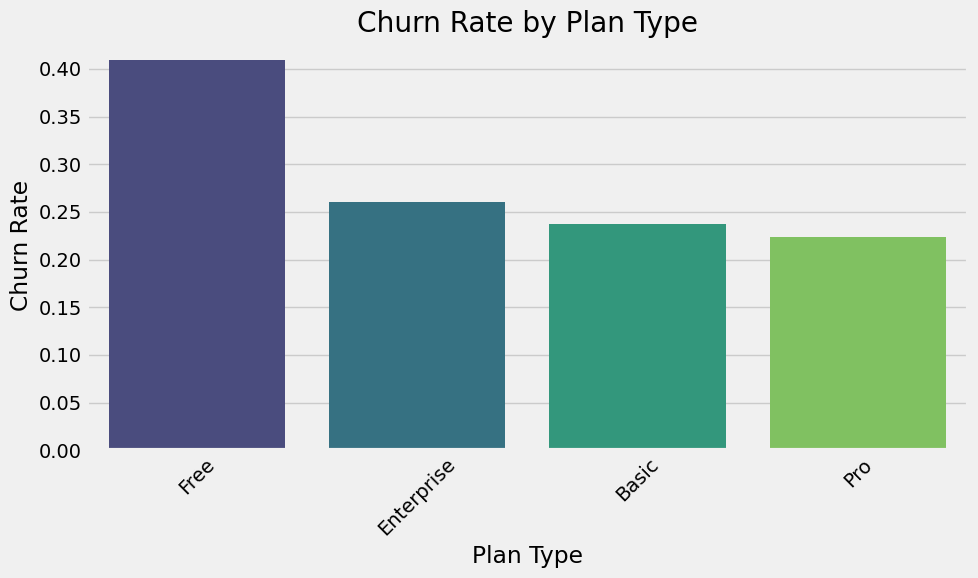

In [50]:
# Churn Rate by Plan Type
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_plan.index, y=churn_rate_by_plan.values, palette='viridis')
plt.title('Churn Rate by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

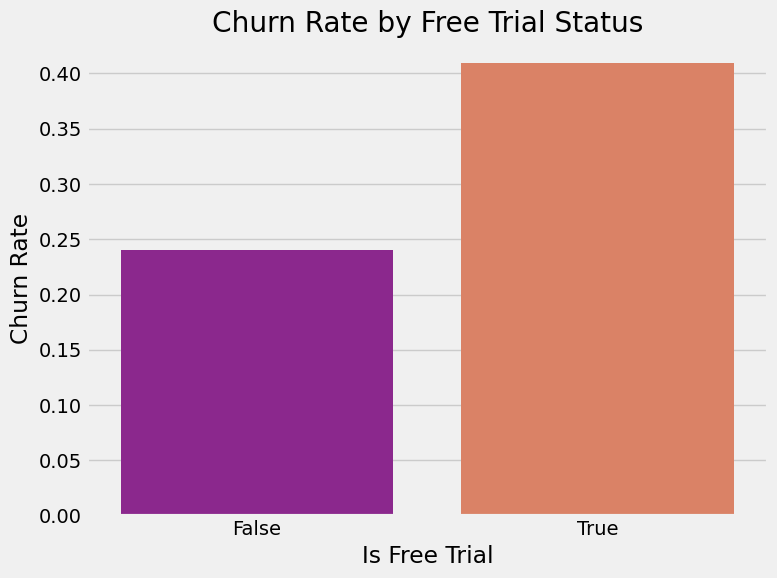

In [51]:
# Churn Rate by Free Trial Status
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_free_trial.index, y=churn_rate_by_free_trial.values, hue=churn_rate_by_free_trial.index, palette='plasma', legend=False)
plt.title('Churn Rate by Free Trial Status')
plt.xlabel('Is Free Trial')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

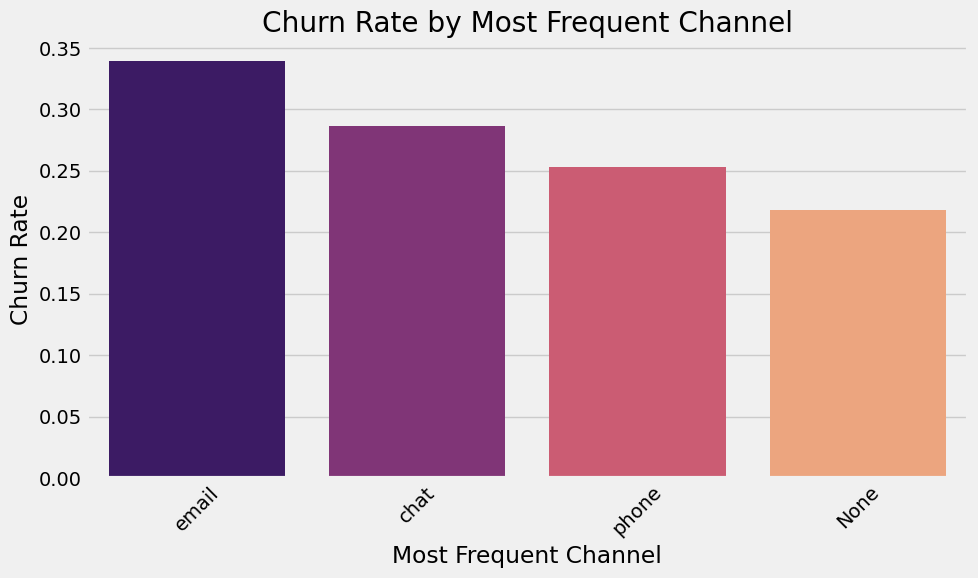

In [52]:
# Churn Rate by Most Frequent Channel
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_channel.index, y=churn_rate_by_channel.values, hue=churn_rate_by_channel.index, palette='magma', legend=False)
plt.title('Churn Rate by Most Frequent Channel')
plt.xlabel('Most Frequent Channel')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

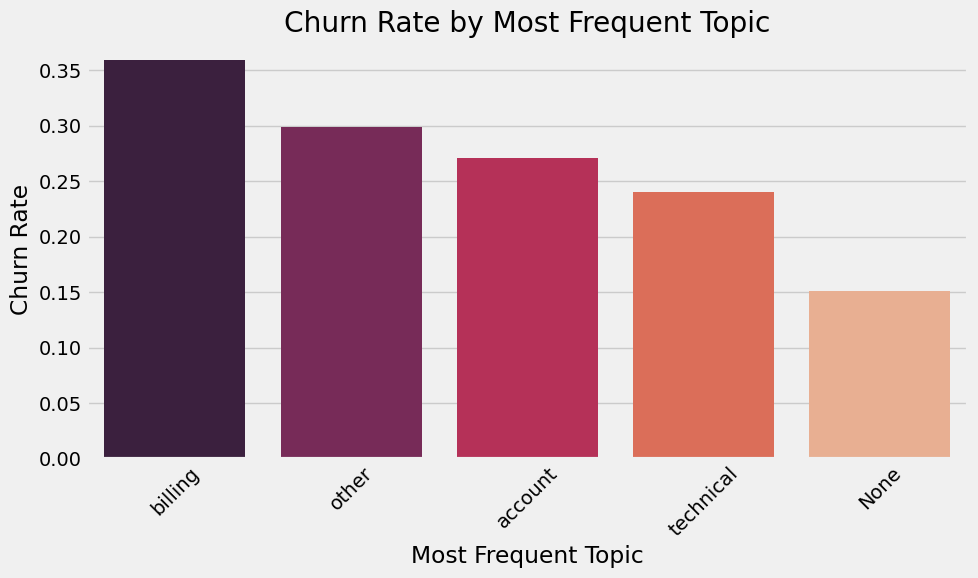

In [53]:
# Churn Rate by Most Frequent Topic
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_topic.index, y=churn_rate_by_topic.values, hue=churn_rate_by_topic.index, palette='rocket', legend=False)
plt.title('Churn Rate by Most Frequent Topic')
plt.xlabel('Most Frequent Topic')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

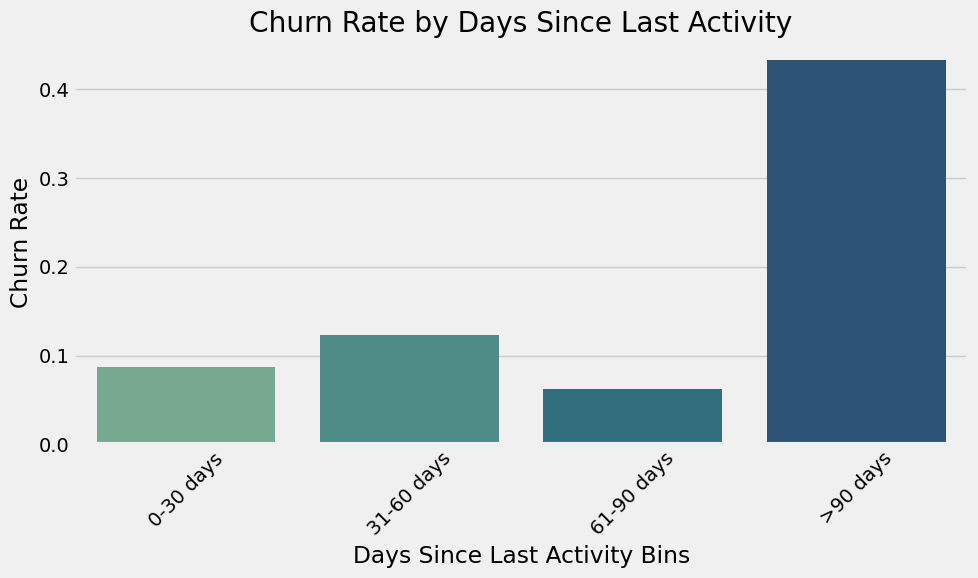

In [54]:
# Churn Rate by Days Since Last Activity
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_activity_bins.index, y=churn_rate_by_activity_bins.values, hue=churn_rate_by_activity_bins.index, palette='crest', legend=False)
plt.title('Churn Rate by Days Since Last Activity')
plt.xlabel('Days Since Last Activity Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Create a grouped bar chart to compare the average 'activity_count' and 'unique_event_types_count' for churned vs. non-churned users

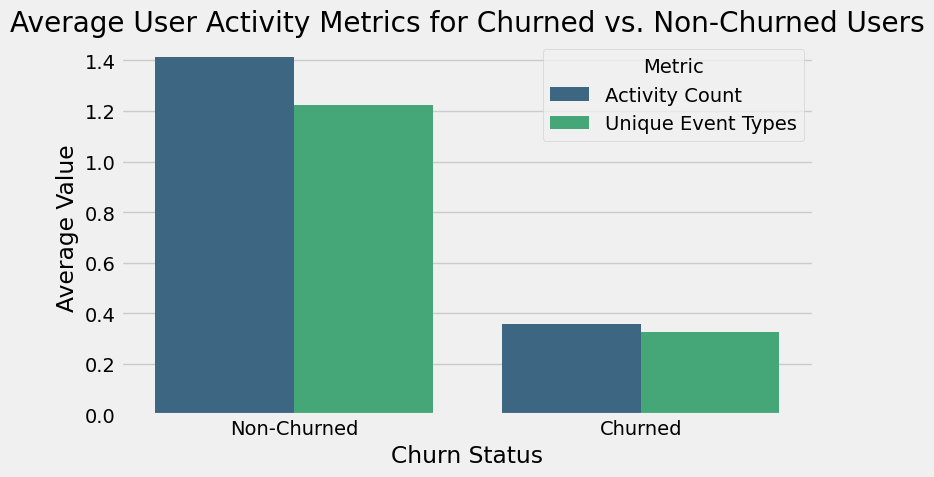

In [55]:
df_activity_churn = pd.DataFrame({
    'Activity Count': avg_activity_count_churn,
    'Unique Event Types': avg_unique_event_types_count_churn
}).reset_index()
df_activity_churn['churn_status'] = df_activity_churn['churn_numeric'].map({0: 'Non-Churned', 1: 'Churned'})
df_activity_churn_melted = df_activity_churn.melt(id_vars=['churn_numeric', 'churn_status'], var_name='Metric', value_name='Average Value')

plt.figure(figsize=(8, 5))
sns.barplot(x='churn_status', y='Average Value', hue='Metric', data=df_activity_churn_melted, palette='viridis')
plt.title('Average User Activity Metrics for Churned vs. Non-Churned Users')
plt.xlabel('Churn Status')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# **Business metric**

To monitor retention, Fit.ly should use the Active Engagement Rate (AER).

- **Definition**: The average number of activities performed per user per month.

- **Business Use**: This serves as a leading indicator. Since activity has a -0.42 correlation with churn, a declining AER predicts a spike in churn 30 days in advance.

- **Current Baseline**: * Retention Target: > 1.40 AER

- **At-Risk Threshold**: < 0.50 AER (Current churned average is 0.36)

In [56]:
# Metric: Support Resolution Efficiency (SRE)
# Percentage of tickets resolved within 12 hours (Product Manager's threshold/Sasha's point)
total_tickets_count = len(customer_support)
fast_resolution_count = len(customer_support[customer_support['resolution_time_hours'] <= 12])
sre_value = (fast_resolution_count / total_tickets_count) * 100

# Identify compliance requests (GDPR)
gdpr_keywords = ['erase', 'wipe', 'forget', 'delete']
compliance_tickets = customer_support[customer_support['comments'].str.contains('|'.join(gdpr_keywords), case=False, na=False)]

print(f"Metric: Support Resolution Efficiency (SRE): {sre_value:.2f}%")
print(f"Number of Compliance (GDPR) tickets identified: {len(compliance_tickets)}")

Metric: Support Resolution Efficiency (SRE): 72.11%
Number of Compliance (GDPR) tickets identified: 22


# **Summary and Recommendations**

Based on the evidence found in the user activity and support data, the following actions are recommended:

1. **Optimize Support Workflows**: Since higher resolution times correlate with churn, the support team should prioritize tickets from "Pro" and "Enterprise" users to protect high-value revenue, while aiming to bring the overall SRE above 85%.
2. **GDPR Compliance Alert**: Engineering must immediately address the **22 identified tickets** requesting data deletion. Failure to process "Right to be Forgotten" requests poses a significant legal and reputational risk.
3. **Engagement for Basic/Free Tiers**: Users with low total activity counts are the most likely to churn. Marketing should launch a "Feature Discovery" campaign targeting these tiers to encourage more frequent use of the `track_workout` and `watch_video` features.
4. **Data Standardisation**: The Engineering team should implement a shared schema for `customer_id` across all teams to prevent future data merging errors and ensure real-time analytics accuracy.

The visualisations are in conformity with the categorical and numerical analysis done earlier.  

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation